# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [4]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

Este Groupby nos muestra la media de bicicletas rentadas teniendo en cuenta si son días hábiles o no hábiles. Esto nos permite ver que en los días hábiles se alquilan en promedio 7 bicicletas más que los domingos o festivos.

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Este Groupby nos muestra la media de bicicletas rentadas teniendo en cuenta la hora de renta. Esto nos permite ver que las horas de mayor venta son las 8 de la mañana y 5 de la tarde. Teniendo en cuenta que anteriormente habiamos visto que se alquilan más los días hábiles, es posible establecer la hipotesis que las personas rentan las bicicletas para transportarse al trabajo o hacer diligencias en el transcurso del día.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

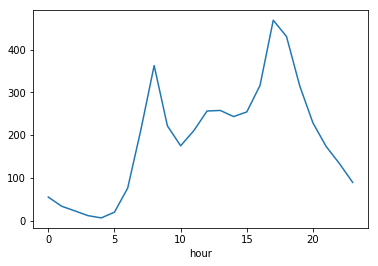

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

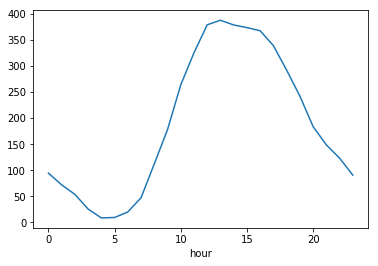

In [11]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

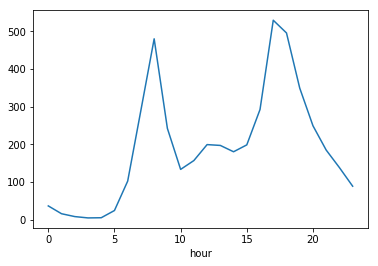

In [12]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

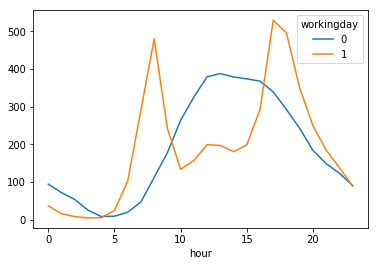

In [13]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Con estos gráficos es posible ver que la tasa de alquiler de bicicletas por horas dependen del tipo de día ya que tal vez esto infiere en el tipo de uso que se le da a este medio de transporte, es decir, los días hábiles el pico de ventas son a las 8 am y 6 pm. es decir, estas se usan para transportarse al trabajo o diligecias diarias, mientras que los fines de semana o festivos el pico de ventas es alrededor de las 12 pm, por lo cual se infiere que el uso es más recreativo.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X_lin = bikes[['hour','workingday']]
Y_lin = bikes['total']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_lin, Y_lin, random_state=1)

In [17]:
linreg = LinearRegression()

In [18]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
linreg.coef_

array([10.49362402,  5.20940956])

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [20]:
bikes['prediction'] = bikes.total.mean()
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,191.574132
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,191.574132
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,191.574132
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,191.574132
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,191.574132
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,191.574132
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,191.574132
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,191.574132
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,191.574132


In [21]:
for hour in range (0,23):
    
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    
    bikes.loc[bikes.hour>=hour,'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()

    print(hour,(((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

0 181.13613357426559
1 178.88076030483188
2 175.61266024769844
3 171.5350162975495
4 166.57596568309665
5 160.50832916137819
6 154.10979930228774
7 150.22560060405686
8 153.86972728404965
9 163.39221989024873
10 165.25615391972227
11 165.00286510437286
12 165.84659205524616
13 168.04756019190663
14 169.94604099621912
15 171.14521362143498
16 172.47403631919644
17 175.2235068708682
18 179.8668827954335
19 181.12705316323988
20 180.44126246625746
21 179.7297936918192
22 179.51222338944388


In [22]:
bikes_izq = bikes.loc[bikes.hour<7].copy()

In [23]:
bikes_izq.hour.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [24]:
def error_hour(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour <hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [25]:
def error_workingday(bikes, workingday):
    bikes['pred'] = bikes.loc[bikes.workingday == workingday, 'total'].mean()
    bikes.loc[bikes.workingday==workingday, 'total'] = bikes.loc[bikes.workingday==workingday, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [26]:
for hour in bikes_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq, hour)

Hour  0
39.56714516247788
Hour  1
38.46175887834954
Hour  2
38.827302356307555
Hour  3
39.34538405588436
Hour  4
39.534113157382144
Hour  5
38.30948200125475
Hour  6
35.24426946227024


In [27]:
bikes_izq.workingday.describe()

count    3139.000000
mean        0.678560
std         0.467104
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: workingday, dtype: float64

In [28]:
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq, workingday)

Working day  1
23.793802057851984
Working day  0
9.727028050540563


In [29]:
bikes_der = bikes.loc[bikes.hour>=7].copy()

for hour in bikes_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der, workingday)

Hour  7
176.28835016242152
Hour  8
175.9626543129351
Hour  9
175.9026463917815
Hour  10
176.22897287604295
Hour  11
176.1454556323947
Hour  12
175.84813796801208
Hour  13
175.89260116453647
Hour  14
175.92916682007098
Hour  15
175.83965773793437
Hour  16
175.82530141788737
Hour  17
176.19523832330185
Hour  18
175.115249088561
Hour  19
170.74027110094912
Hour  20
167.37168785994314
Hour  21
166.69864069956597
Hour  22
168.20616961120874
Hour  23
171.30096203191567
----------------------------------
Working day  1
96.62149535113792
Working day  0
8.410215671382272


## First Node

In [40]:
bikes_izq_izq = bikes_izq.loc[bikes_izq.workingday==0].copy()

for hour in bikes_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_izq, workingday)

Hour  0
4.973799150320701e-14
Hour  1
4.973799150320701e-14
Hour  2
4.973799150320701e-14
Hour  3
4.973799150320701e-14
Hour  4
4.973799150320701e-14
Hour  5
4.973799150320701e-14
Hour  6
4.973799150320701e-14
----------------------------------
Working day  1
nan
Working day  0
0.0


Giving continuity to the analysis

In [31]:
bikes_izq_der = bikes_izq.loc[bikes_izq.workingday==1].copy()

for hour in bikes_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_der, workingday)

Hour  0
9.094947017729282e-13
Hour  1
7.739682226511052e-13
Hour  4
4.720658586079215e-13
Hour  5
6.166462879447689e-13
Hour  6
7.739682226511052e-13
Hour  2
6.171650834648166e-13
Hour  3
4.685320426564897e-13
----------------------------------
Working day  1
0.0
Working day  0
nan


## Second Node

In [32]:
bikes_izq_der_izq = bikes_izq_der.loc[bikes_izq.hour < 3].copy()

for hour in bikes_izq_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_der_izq, workingday)

Hour  0
2.4513724383723456e-13
Hour  1
1.5004463862005815e-13
Hour  2
1.560938301981418e-13
----------------------------------
Working day  1
0.0
Working day  0
nan


## Third Node

In [33]:
bikes_izq_der_der = bikes_izq_der.loc[bikes_izq.hour >=3].copy()

for hour in bikes_izq_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_der_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_der_der, workingday)

Hour  0
2.948752353404416e-13
Hour  1
2.948752353404416e-13
Hour  2
2.948752353404416e-13
----------------------------------
Working day  1
0.0
Working day  0
nan


Continue the analysis now by the upper right node

In [34]:
bikes_der_izq = bikes_der.loc[bikes_der.workingday==0].copy()

for hour in bikes_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_izq, workingday)

Hour  7
9.379164112033322e-13
Hour  8
1.9589039145927664e-12
Hour  9
5.0233121916912995e-12
Hour  10
6.386828587452924e-12
Hour  11
5.947172537483279e-12
Hour  12
5.531278224450998e-12
Hour  13
5.2843162368725464e-12
Hour  14
5.127782734943928e-12
Hour  15
5.042793783498174e-12
Hour  16
5.042793783498174e-12
Hour  17
5.127782734943928e-12
Hour  18
5.2843162368725464e-12
Hour  19
5.531278224450998e-12
Hour  20
5.947172537483279e-12
Hour  21
6.386828587452924e-12
Hour  22
5.0233121916912995e-12
Hour  23
1.9589039145927664e-12
----------------------------------
Working day  1
nan
Working day  0
0.0


In [35]:
bikes_der_der = bikes_der.loc[bikes_der.workingday==1].copy()

for hour in bikes_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_der, workingday)

Hour  7
1.3358203432289883e-11
Hour  8
7.83278355847345e-12
Hour  9
2.0139415475529585e-12
Hour  10
4.6504151115477995e-12
Hour  11
1.0992785956025867e-11
Hour  12
1.0280431308726188e-11
Hour  13
9.849126814201641e-12
Hour  14
9.601197023844333e-12
Hour  15
9.455270509499096e-12
Hour  16
9.479413903108771e-12
Hour  17
9.598263968008561e-12
Hour  18
9.856136055177946e-12
Hour  19
1.0279549114958014e-11
Hour  20
1.0986701880817082e-11
Hour  21
4.707009005489036e-12
Hour  22
1.961294381289782e-12
Hour  23
7.832000849542934e-12
----------------------------------
Working day  1
0.0
Working day  0
nan


## Fourth Node

In [36]:
bikes_der_izq_izq = bikes_der_izq.loc[bikes_der_izq.hour < 8].copy()

for hour in bikes_der_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_izq_izq, workingday)

Hour  7
2.5579538487363607e-13
----------------------------------
Working day  1
nan
Working day  0
0.0


## Fifth Node

In [37]:
bikes_der_izq_der = bikes_der_izq.loc[bikes_der_izq.hour >= 8].copy()

for hour in bikes_der_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_izq_der, workingday)

Hour  8
2.5579538487363607e-12
Hour  9
5.6693162527709785e-12
Hour  10
7.023519963330231e-12
Hour  11
6.565476396986689e-12
Hour  12
5.995498806233233e-12
Hour  13
5.432079464643214e-12
Hour  14
5.075006412657657e-12
Hour  15
4.873763815865506e-12
Hour  16
4.803268893738277e-12
Hour  17
4.873763815865506e-12
Hour  18
5.075006412657657e-12
Hour  19
5.432079464643214e-12
Hour  20
5.995498806233233e-12
Hour  21
6.565476396986689e-12
Hour  22
7.023519963330231e-12
Hour  23
5.6693162527709785e-12
----------------------------------
Working day  1
nan
Working day  0
0.0


## Sixth Node

In [38]:
bikes_der_der_izq = bikes_der_der.loc[bikes_der_der.hour < 12].copy()

for hour in bikes_der_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_der_izq, workingday)

Hour  7
7.73070496506989e-12
Hour  8
2.818080927752541e-12
Hour  9
2.1288600301559544e-12
Hour  10
2.1288600301559544e-12
Hour  11
2.818080927752541e-12
----------------------------------
Working day  1
0.0
Working day  0
nan


## Seventh Node

In [39]:
bikes_der_der_der = bikes_der_der.loc[bikes_der_der.hour >= 12].copy()

for hour in bikes_der_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_der_der, workingday)

Hour  12
7.958078640513122e-12
Hour  13
5.5663272737340205e-12
Hour  14
3.017255955248905e-12
Hour  15
1.1084466677857563e-12
Hour  16
3.676118584317872e-12
Hour  17
8.539324552755246e-12
Hour  18
1.0913936421275139e-11
Hour  19
8.539324552755246e-12
Hour  20
3.676118584317872e-12
Hour  21
1.1084466677857563e-12
Hour  22
3.017255955248905e-12
Hour  23
5.5663272737340205e-12
----------------------------------
Working day  1
0.0
Working day  0
nan


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [71]:
# define X and y
X = bikes[['hour', 'workingday',]]
Y = bikes['total']

In [72]:
# instantiate a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(criterion='mse', max_depth=6)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [73]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
scores = cross_val_score(treereg, X, Y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

106.30130069442295

In [82]:
#Tuning a regression tree
# list of values to try
max_depth_range = range(1, 15)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, Y, cv=20, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

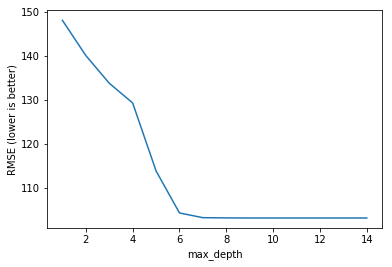

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [88]:
#We can see that max_depth=6 was best so now we'll see the "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':X, 'importance':treereg.feature_importances_})

,feature,importance
0,"(h, o, u, r)",0.81505
1,"(w, o, r, k, i, n, g, d, a, y)",0.18495


In [143]:
#Trying with more variables
# define X and y
X1 = bikes[['hour', 'workingday','weather','season']]
Y1 = bikes['total']

In [144]:
treereg= DecisionTreeRegressor(criterion='mse', max_depth=6)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [145]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
scores = cross_val_score(treereg, X1, Y1, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

120.97829738806982

In [146]:
#Tuning a regression tree
# list of values to try
max_depth_range = range(1, 15)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X1, Y1, cv=20, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

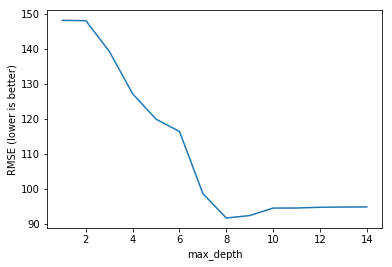

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [162]:
# max_depth=8 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=8, random_state=1)
treereg.fit(X1, Y1)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [163]:
scores = cross_val_score(treereg, X1, Y1, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

94.8447614491142

In [164]:
#Gini Importance
pd.DataFrame({'feature':X1, 'importance':treereg.feature_importances_})

,feature,importance
0,"(h, o, u, r)",0.698206
1,"(w, o, r, k, i, n, g, d, a, y)",0.163247
2,"(w, e, a, t, h, e, r)",0.035709
3,"(s, e, a, s, o, n)",0.102838


We can see that with two variables and the correct depth (6) the model give us an error equal to 106,3 keeping in mind the importace of 0,81 of the hour variable.
Now, if we include more variables as weather and season with 6 max_depth the model increase the error to 120,9. But if we can tuning the regression tree, we see that the correct depth are 8, so we fit the tree using that parameter with which the model reduces the error to 94.8